### Dairo Alberto Cuervo Garcia
#### Proyecto de grado - Exploración de discurso en cartas de maximos responsables - Maestría en Ciencias de los Datos y Analítica - Universidad EAFIT - 2024/1

## Exploración BD Final
Se explora la base de datos final Resultados.csv

In [1]:
# Cargar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, chi2_contingency


In [2]:
ruta_archivo_csv = r'C:\Users\DairoAlbertoCuervoGa\Downloads\Text_project\1.1.Output\Resultados.csv' # Cargar archivo csv
df_in = pd.read_csv(ruta_archivo_csv)
df_in.head()

,Unnamed: 0,Empresa_Año,Empresa,Año,Texto,Sector,Sector_agrupado,Bolsa,texto_limpio,texto_tokenizado,...,Tema_4,Sentimiento_Textblob,Polaridad_Textblob,Sentimiento_VADER,Polaridad_VADER,Sentimiento_Sistema_Hibrido,Beta,Alpha (intercepto),Signo_Alpha,Riesgo_Beta
0,0,BancodeBogota_2018,BancodeBogota,2018,"Estimados accionistas,\nMe complace dirigirme ...",Financiero,Financiero,BVC,estimados accionistas me complace dirigirme u...,estimados accionistas complace dirigirme usted...,...,-0.019634,Positivo,0.041398,Positivo,0.7650,Positivo,0.318007,-0.011954,0,Bajo_Riesgo
1,1,BancodeBogota_2019,BancodeBogota,2019,"Muy estimados accionistas,\nEs un honor dirigi...",Financiero,Financiero,BVC,muy estimados accionistas es un honor dirigirm...,estimados accionistas honor dirigirme ustedes ...,...,0.004532,Neutro,0.002857,Positivo,0.9169,Neutro,0.627847,0.024558,1,Bajo_Riesgo
2,2,BancodeBogota_2020,BancodeBogota,2020,"Muy estimados accionistas, colaboradores y\ncl...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes e...,...,0.090714,Positivo,0.039431,Negativo,-0.8689,Negativo,0.619644,-0.002638,0,Bajo_Riesgo
3,3,BancodeBogota_2021,BancodeBogota,2021,"Muy estimados accionistas, colaboradores y cli...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes b...,...,0.019181,Positivo,0.022727,Positivo,0.9805,Positivo,0.148086,-0.004560,0,Bajo_Riesgo
4,4,BancodeBogota_2022,BancodeBogota,2022,"Muy estimados accionistas, colaboradores y cli...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes b...,...,0.052665,Positivo,0.087356,Positivo,0.9878,Positivo,1.049489,-0.012813,0,Alto_Riesgo


In [3]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   203 non-null    int64  
 1   Empresa_Año                  203 non-null    object 
 2   Empresa                      203 non-null    object 
 3   Año                          203 non-null    int64  
 4   Texto                        203 non-null    object 
 5   Sector                       203 non-null    object 
 6   Sector_agrupado              203 non-null    object 
 7   Bolsa                        203 non-null    object 
 8   texto_limpio                 203 non-null    object 
 9   texto_tokenizado             203 non-null    object 
 10  texto_lematizado             203 non-null    object 
 11  Similaridad                  203 non-null    float64
 12  Tema_0                       203 non-null    float64
 13  Tema_1              

In [4]:
df_in.describe()

,Unnamed: 0,Año,Similaridad,Tema_0,Tema_1,Tema_2,Tema_3,Tema_4,Polaridad_Textblob,Polaridad_VADER,Beta,Alpha (intercepto),Signo_Alpha
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,101.000000,2017.290640,0.286004,0.833746,-0.061355,-0.012523,0.005143,0.004650,0.056113,0.400977,0.732108,0.001040,0.527094
std,58.745213,3.100505,0.158801,0.111315,0.289392,0.277538,0.263467,0.244556,0.115350,0.515577,0.553585,0.020494,0.500500
min,0.000000,2012.000000,0.000000,0.488012,-0.550883,-0.608945,-0.548678,-0.454676,-0.383333,-0.972300,-0.656124,-0.067743,0.000000
25%,50.500000,2015.000000,0.195338,0.776956,-0.258685,-0.191820,-0.176030,-0.198333,0.004125,0.000000,0.359859,-0.009123,0.000000
50%,101.000000,2017.000000,0.296675,0.871366,-0.129160,-0.044128,-0.037385,-0.037004,0.039706,0.542300,0.728898,0.000729,1.000000
75%,151.500000,2020.000000,0.374630,0.915879,0.107969,0.165530,0.141497,0.223266,0.105539,0.867250,1.113213,0.013891,1.000000
max,202.000000,2022.000000,0.791478,0.981045,0.761098,0.593586,0.822455,0.546126,0.500000,0.998800,1.964586,0.055435,1.000000


In [5]:
df_in.isna().sum()

Unnamed: 0                     0
Empresa_Año                    0
Empresa                        0
Año                            0
Texto                          0
Sector                         0
Sector_agrupado                0
Bolsa                          0
texto_limpio                   0
texto_tokenizado               0
texto_lematizado               0
Similaridad                    0
Tema_0                         0
Tema_1                         0
Tema_2                         0
Tema_3                         0
Tema_4                         0
Sentimiento_Textblob           0
Polaridad_Textblob             0
Sentimiento_VADER              0
Polaridad_VADER                0
Sentimiento_Sistema_Hibrido    0
Beta                           0
Alpha (intercepto)             0
Signo_Alpha                    0
Riesgo_Beta                    0
dtype: int64

### Transformar variables con one-hot encoding 
En este caso one-hot encoding se usa para crear una nueva columna para cada categoría de los sentimientos de los modelos de SA, esto por que no se asume una relación ordinal.

In [6]:
# Aplicar One-Hot Encoding a las columnas de sentimiento con get_dummies de Pandas
df_in = pd.get_dummies(df_in, columns=['Sentimiento_Sistema_Hibrido', 'Sentimiento_VADER', 'Sentimiento_Textblob'])

# Convertir columnas de dummies de booleano a entero
for column in df_in.columns:
    if 'Sentimiento' in column:  
        df_in[column] = df_in[column].astype(int)
df_in.head()


,Unnamed: 0,Empresa_Año,Empresa,Año,Texto,Sector,Sector_agrupado,Bolsa,texto_limpio,texto_tokenizado,...,Riesgo_Beta,Sentimiento_Sistema_Hibrido_Negativo,Sentimiento_Sistema_Hibrido_Neutro,Sentimiento_Sistema_Hibrido_Positivo,Sentimiento_VADER_Negativo,Sentimiento_VADER_Neutro,Sentimiento_VADER_Positivo,Sentimiento_Textblob_Negativo,Sentimiento_Textblob_Neutro,Sentimiento_Textblob_Positivo
0,0,BancodeBogota_2018,BancodeBogota,2018,"Estimados accionistas,\nMe complace dirigirme ...",Financiero,Financiero,BVC,estimados accionistas me complace dirigirme u...,estimados accionistas complace dirigirme usted...,...,Bajo_Riesgo,0,0,1,0,0,1,0,0,1
1,1,BancodeBogota_2019,BancodeBogota,2019,"Muy estimados accionistas,\nEs un honor dirigi...",Financiero,Financiero,BVC,muy estimados accionistas es un honor dirigirm...,estimados accionistas honor dirigirme ustedes ...,...,Bajo_Riesgo,0,1,0,0,0,1,0,1,0
2,2,BancodeBogota_2020,BancodeBogota,2020,"Muy estimados accionistas, colaboradores y\ncl...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes e...,...,Bajo_Riesgo,1,0,0,1,0,0,0,0,1
3,3,BancodeBogota_2021,BancodeBogota,2021,"Muy estimados accionistas, colaboradores y cli...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes b...,...,Bajo_Riesgo,0,0,1,0,0,1,0,0,1
4,4,BancodeBogota_2022,BancodeBogota,2022,"Muy estimados accionistas, colaboradores y cli...",Financiero,Financiero,BVC,muy estimados accionistas colaboradores clien...,estimados accionistas colaboradores clientes b...,...,Alto_Riesgo,0,0,1,0,0,1,0,0,1


### Selección de variables finales a trabajar

In [7]:
# Análizar por cada grupo de variables generadas para SA en One-hot encoding
columnas_one_hot_hibrido = [col for col in df_in.columns if col.startswith('Sentimiento_Sistema_Hibrido_')]
columnas_one_hot_Textblob = [col for col in df_in.columns if col.startswith('Sentimiento_Textblob_')]
columnas_one_hot_Vader = [col for col in df_in.columns if col.startswith('Sentimiento_VADER_')]

# Añadir estas columnas a la lista de columnas para análisis junto con otras variables de interés
columnas_analisis = ['Signo_Alpha', 'Similaridad', 'Tema_0', 'Tema_1', 'Tema_2', 'Tema_3', 'Tema_4'] + \
    [col for col in df_in.columns if col.startswith('Sentimiento_') and not col.endswith('Positivo')] #Excluir una categoria para evitar multicolinealidad perfecta dado el one-hot encoding

df_vartotpri = df_in[columnas_analisis]

df_vartotpri.head()


,Signo_Alpha,Similaridad,Tema_0,Tema_1,Tema_2,Tema_3,Tema_4,Sentimiento_Sistema_Hibrido_Negativo,Sentimiento_Sistema_Hibrido_Neutro,Sentimiento_VADER_Negativo,Sentimiento_VADER_Neutro,Sentimiento_Textblob_Negativo,Sentimiento_Textblob_Neutro
0,0,0.000000,0.889257,0.245722,0.355171,-0.149371,-0.019634,0,0,0,0,0,0
1,1,0.379376,0.930512,0.150787,0.327941,-0.062011,0.004532,0,1,0,0,0,1
2,0,0.394835,0.891750,0.238575,0.331326,-0.172792,0.090714,1,0,1,0,0,0
3,0,0.416396,0.893310,0.225571,0.357737,-0.150902,0.019181,0,0,0,0,0,0
4,0,0.514966,0.912318,0.136119,0.345380,-0.164580,0.052665,0,0,0,0,0,0


## Correlación total

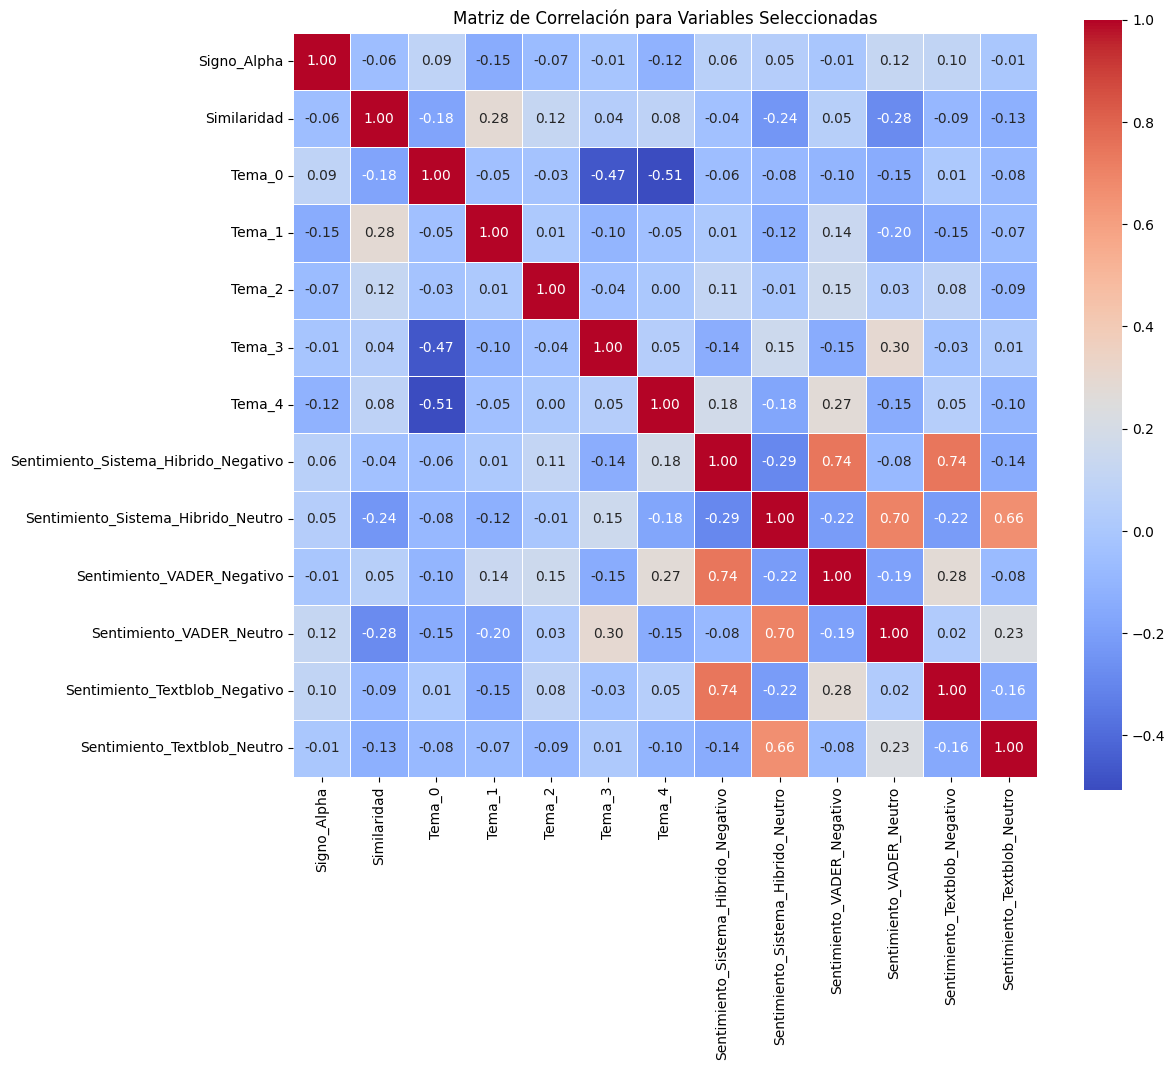

In [8]:
df_correlacion = df_vartotpri.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_correlacion.corr(method='pearson')

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriz de Correlación para Variables Seleccionadas")
plt.show()


### Factor de Inflación de la Varianza (VIF)
Técnica más específica para identificar multicolinealidad. Un VIF alto para una variable indica que la variable es altamente colineal con otras variables independientes.
- Un VIF de 1 indica que no hay correlación entre la variable independiente y otras variables.
- Un VIF entre 1 y 5 generalmente indica una multicolinealidad baja que puede ser aceptable dependiendo del contexto.
- Un VIF entre 5-10 sugiere que la multicolinealidad moderada que puede ser problemática y debe abordarse.
- Un VIF mayor a 10 sugiere que la multicolinealidad alta problemática y debe abordarse.

In [9]:
# Seleccionar variables para VIF excluyendo una columna dummy por cada grupo
columnas_vif = [col for col in df_correlacion.columns if not col.endswith('Positivo')]  # Excluir una categoría por grupo para evitar la multicolinealidad perfecta
df_vif = df_correlacion[columnas_vif]
df_vif = sm.add_constant(df_vif)  # Añadir constante

# Calcular VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)

                                Variable         VIF
0                                  const  136.328450
1                            Signo_Alpha    1.067474
2                            Similaridad    1.267447
3                                 Tema_0    2.073462
4                                 Tema_1    1.226269
5                                 Tema_2    1.089140
6                                 Tema_3    1.554819
7                                 Tema_4    1.670678
8   Sentimiento_Sistema_Hibrido_Negativo    8.272935
9     Sentimiento_Sistema_Hibrido_Neutro    4.989433
10            Sentimiento_VADER_Negativo    4.049367
11              Sentimiento_VADER_Neutro    3.192755
12         Sentimiento_Textblob_Negativo    3.754412
13           Sentimiento_Textblob_Neutro    2.376972


## Análisis de la Relación entre el signo de Alpha y las variables calculadas
Singo_Alpha se encuentra en término positivo y negativo (1, 0), se utiliza boxplots y gráficos de barras para visualizar y comparar la distribución de varias métricas claves entre grupos definidos por el Signo_Alpha

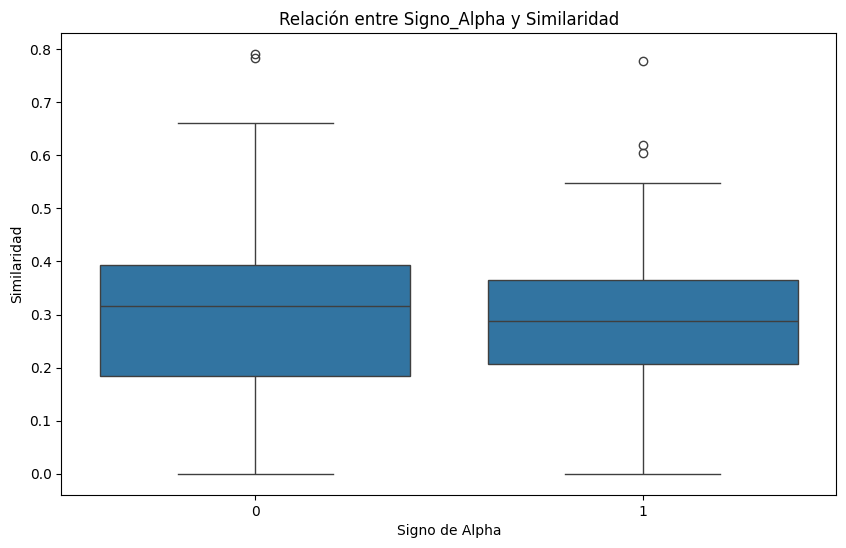

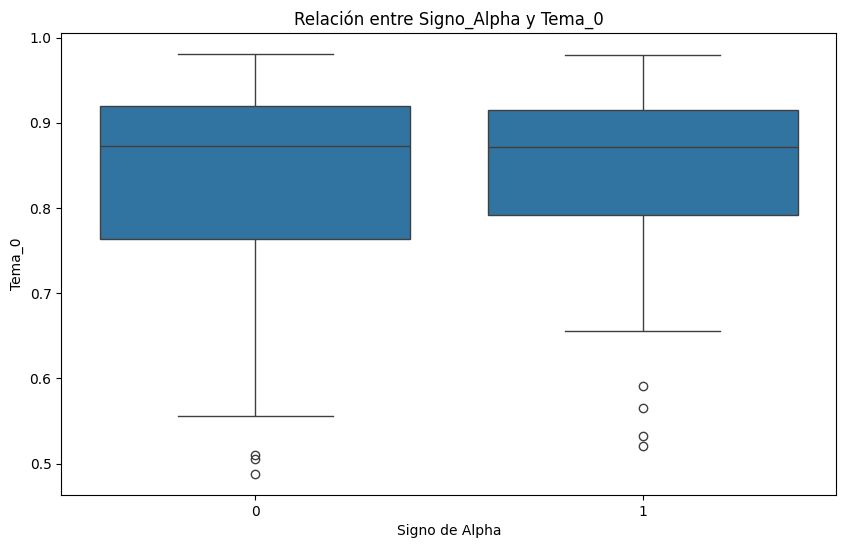

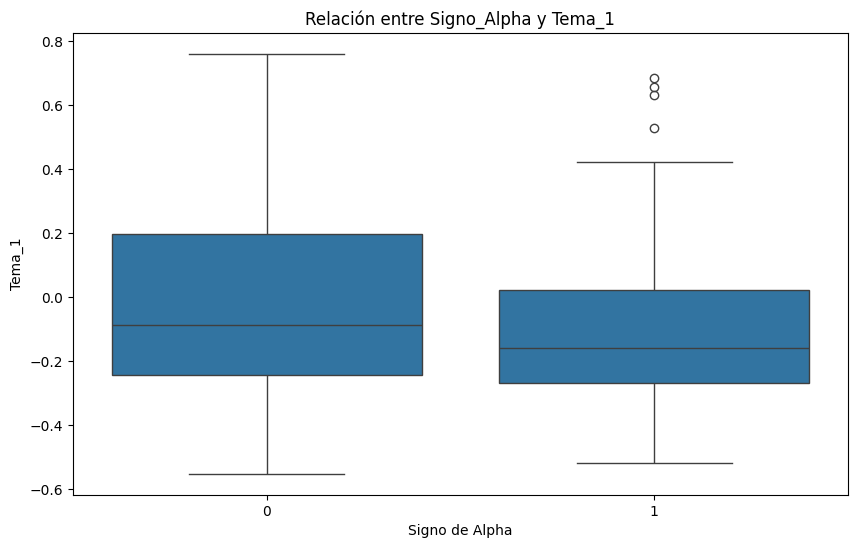

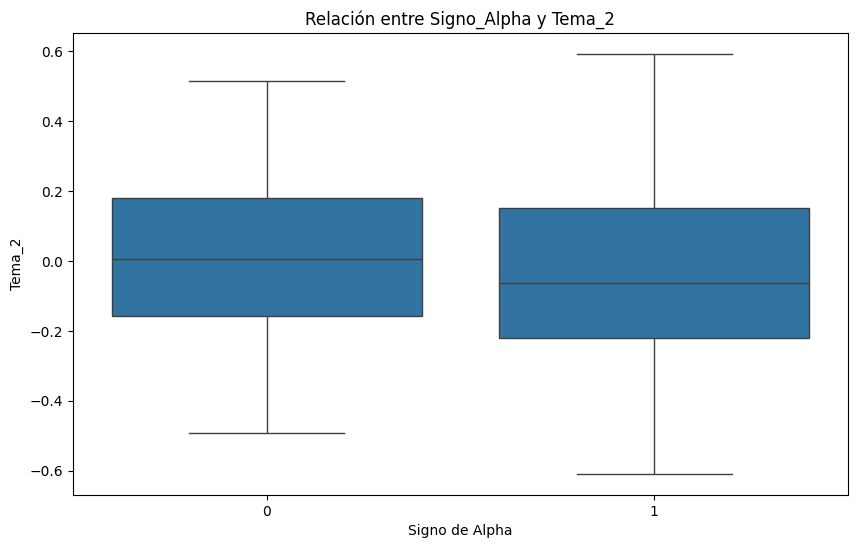

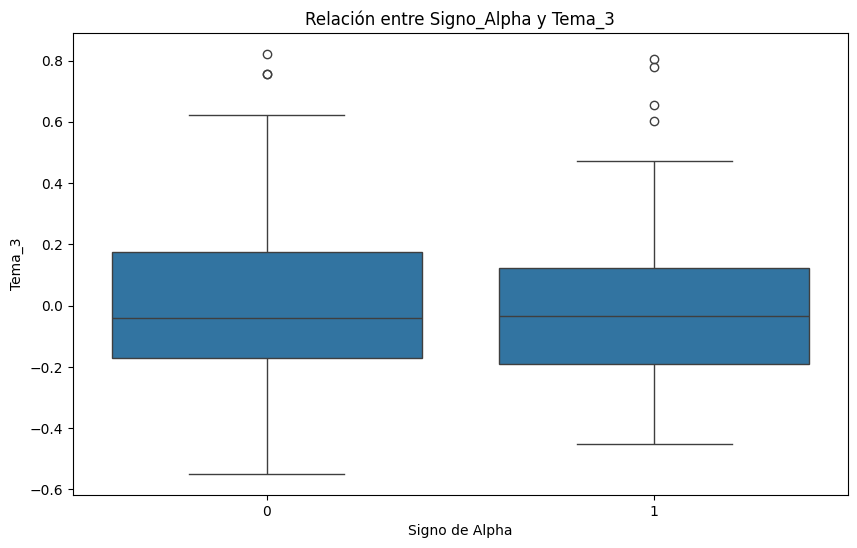

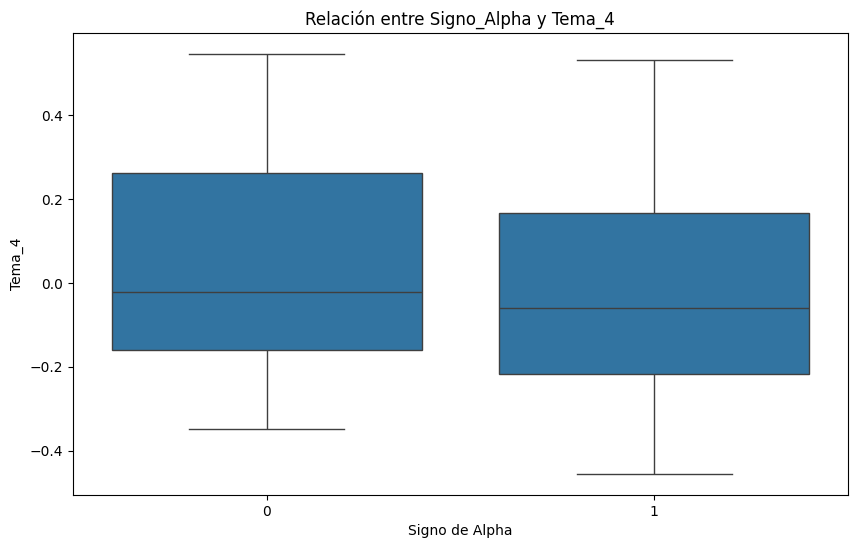

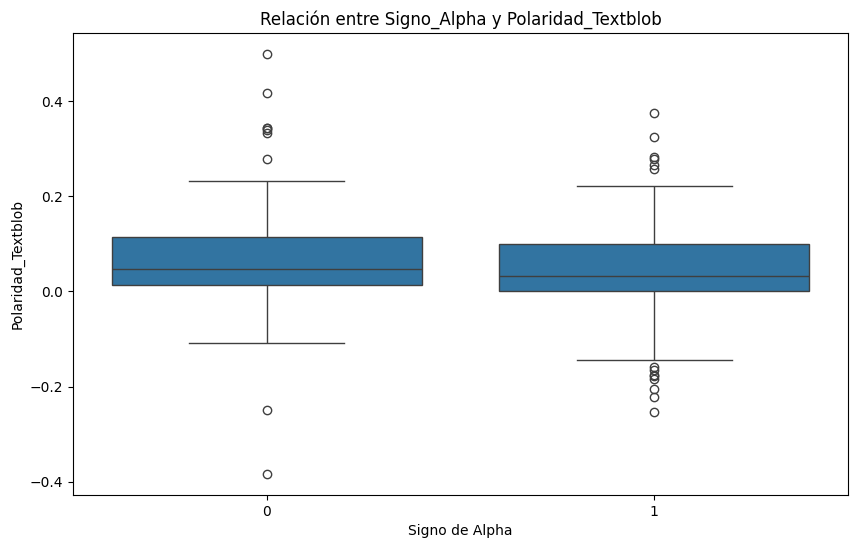

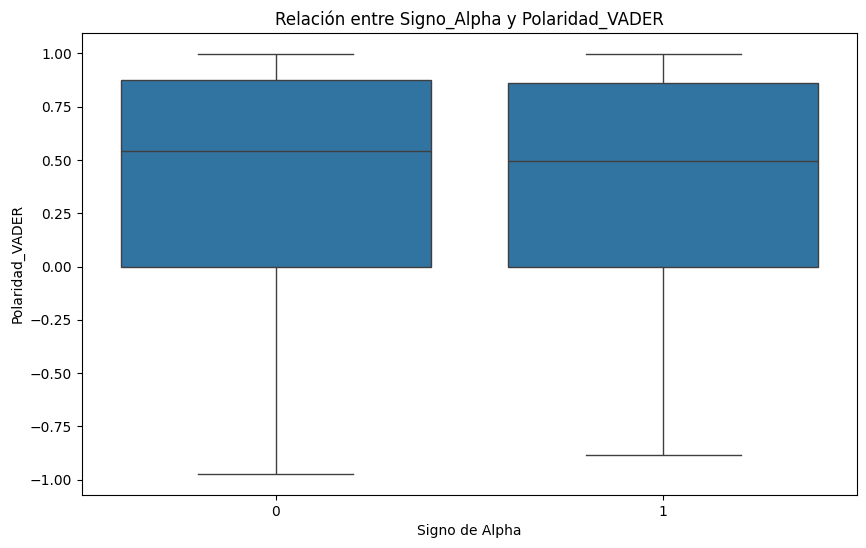

T-test para Similaridad entre grupos positivos y negativos de Alpha: p-value = 0.42561637202957303
T-test para Tema_0 entre grupos positivos y negativos de Alpha: p-value = 0.19031028352791232
T-test para Tema_1 entre grupos positivos y negativos de Alpha: p-value = 0.040358775089339785
T-test para Tema_2 entre grupos positivos y negativos de Alpha: p-value = 0.34236241612909246
T-test para Tema_3 entre grupos positivos y negativos de Alpha: p-value = 0.849994569173019
T-test para Tema_4 entre grupos positivos y negativos de Alpha: p-value = 0.09509969494060198
T-test para Polaridad_Textblob entre grupos positivos y negativos de Alpha: p-value = 0.06855037487526673
T-test para Polaridad_VADER entre grupos positivos y negativos de Alpha: p-value = 0.3718552118255044
Chi-squared test para Sentimiento_Textblob con Signo_Alpha: p-value = 0.35527539407574305
Chi-squared test para Sentimiento_VADER con Signo_Alpha: p-value = 0.23349570726075505
Chi-squared test para Sentimiento_Sistema_Hibri

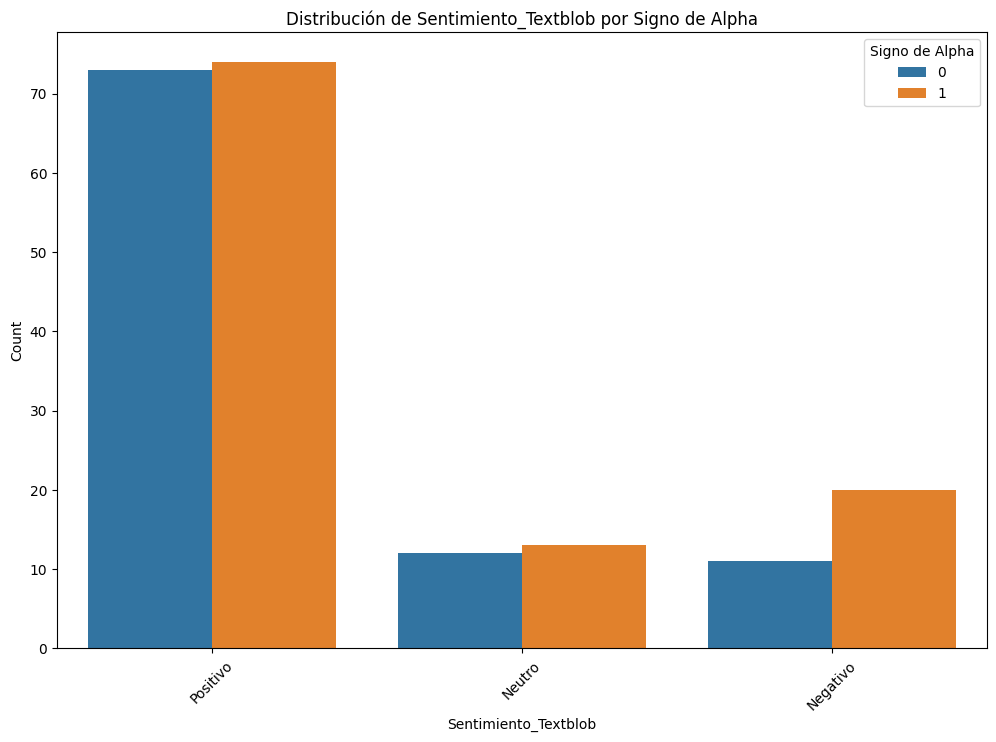

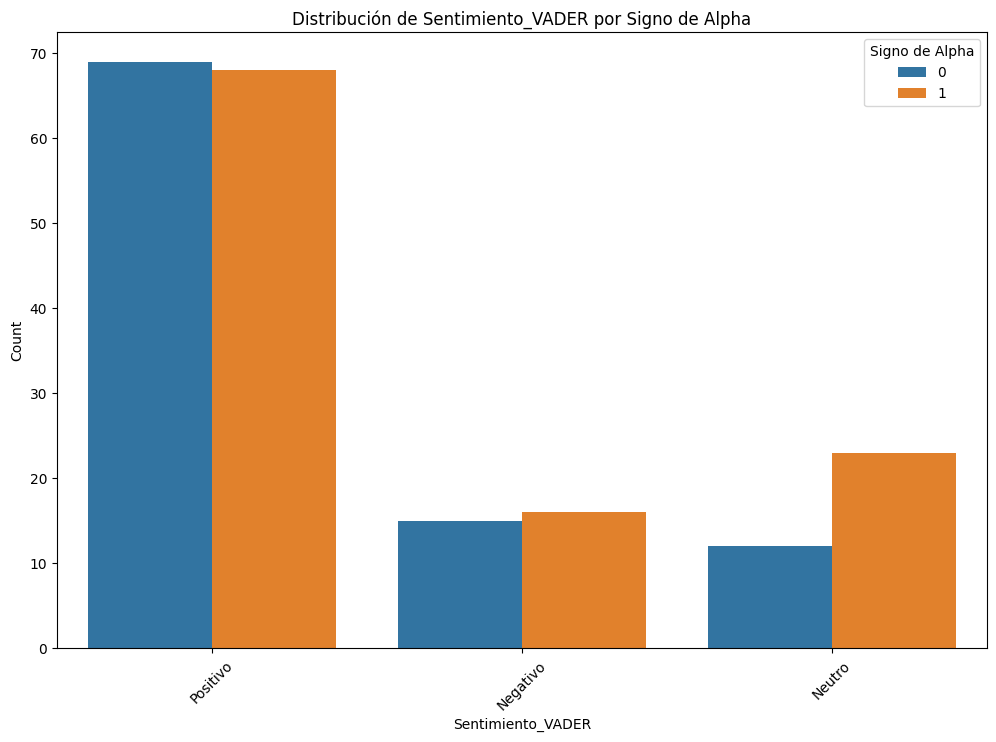

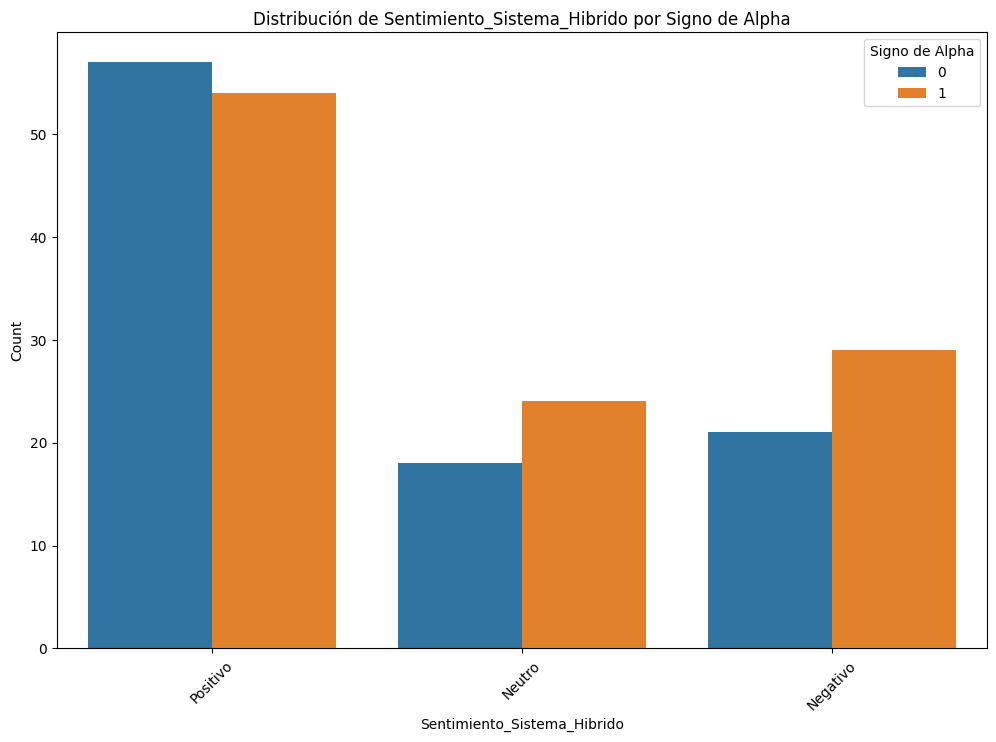

In [10]:
# Cargar nuevamente datos para evitar transformaciones
ruta_archivo_csv = r'C:\Users\DairoAlbertoCuervoGa\Downloads\Text_project\1.1.Output\Resultados.csv'
df = pd.read_csv(ruta_archivo_csv)

# Visualización de relaciones entre Signo_Alpha y variables numéricas
variables_numericas = ['Similaridad', 'Tema_0', 'Tema_1', 'Tema_2', 'Tema_3', 'Tema_4', 'Polaridad_Textblob', 'Polaridad_VADER']
for variable in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Signo_Alpha', y=variable, data=df)
    plt.title(f'Relación entre Signo_Alpha y {variable}')
    plt.xlabel('Signo de Alpha')
    plt.ylabel(variable)
    plt.show()

# T-test para variables numéricas
for variable in variables_numericas:
    grupo_positivo = df[df['Signo_Alpha'] == 1][variable]
    grupo_negativo = df[df['Signo_Alpha'] == 0][variable]
    t_stat, p_val = ttest_ind(grupo_positivo, grupo_negativo, equal_var=False)
    print(f"T-test para {variable} entre grupos positivos y negativos de Alpha: p-value = {p_val}")

# Análisis de chi-squared para variables categóricas
variables_categoricas = ['Sentimiento_Textblob', 'Sentimiento_VADER', 'Sentimiento_Sistema_Hibrido']
for variable in variables_categoricas:
    contingency_table = pd.crosstab(df[variable], df['Signo_Alpha'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test para {variable} con Signo_Alpha: p-value = {p}")

# Visualización de relaciones entre Signo_Alpha y variables categóricas
for variable in variables_categoricas:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=variable, hue='Signo_Alpha', data=df)
    plt.title(f'Distribución de {variable} por Signo de Alpha')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Signo de Alpha')
    plt.show()


## Análisis de Alpha por Sector mediante regresión logistica
Agrupar empresas por sectores o clusters con características similares y realizar análisis dentro de cada grupo.
Pasos:
- Agrupar por sectores: Realizar análisis de regresión para cada sector.
- Agrupar sectores: Dado que existen sectores con una o dos empresas se agrupa en las 2 categorias más grandes más una que incluye el resto.

### Grupo de Sectores:
- Energetico
- Financiero
- Otros Sectores

#### Analisis de variables númericas

In [11]:
# Suponiendo que df_in ya está cargado y contiene todas las columnas necesarias
# Preparación inicial de datos
df_in['Año'] = df_in['Empresa_Año'].apply(lambda x: int(x.split('_')[1]))
df_in['Sector_agrupado'] = df_in['Sector_agrupado'].astype('category')
df_in['Signo_Alpha'] = df_in['Signo_Alpha'].apply(lambda x: 1 if x > 0 else 0)

# Preparar listas de columnas para el análisis
columnas_modelo = ['Similaridad', 'Tema_0', 'Tema_1', 'Tema_2', 'Tema_3', 'Tema_4']

# Verificar colinealidad con las columnas seleccionadas
correlation_matrix = df_in[columnas_modelo].corr()
print(correlation_matrix)

# Resultados de modelos de regresión por sector
results = {}
for sector_agrupado in df_in['Sector_agrupado'].unique():
    sector_agrupado_data = df_in[df_in['Sector_agrupado'] == sector_agrupado]
    X = sector_agrupado_data[columnas_modelo]
    y = sector_agrupado_data['Signo_Alpha']
    X = sm.add_constant(X)  # Añadir constante para el intercepto

    # Ajustar modelo de regresión logística
    try:
        model = Logit(y, X).fit(disp=0)  # disp=0 para no imprimir el proceso de ajuste
        results[sector_agrupado] = model.summary()
    except Exception as e:
        print(f'Error en el sector_agrupado {sector_agrupado}: {e}')

# Mostrar resultados para todos los sectores
for sector_agrupado, result in results.items():
    print(f'Resultados para el sector_agrupado {sector_agrupado}')
    print(result)

             Similaridad    Tema_0    Tema_1    Tema_2    Tema_3    Tema_4
Similaridad     1.000000 -0.179022  0.284227  0.121397  0.041740  0.084558
Tema_0         -0.179022  1.000000 -0.045714 -0.025107 -0.469905 -0.506305
Tema_1          0.284227 -0.045714  1.000000  0.005781 -0.102337 -0.045395
Tema_2          0.121397 -0.025107  0.005781  1.000000 -0.041929  0.002032
Tema_3          0.041740 -0.469905 -0.102337 -0.041929  1.000000  0.045030
Tema_4          0.084558 -0.506305 -0.045395  0.002032  0.045030  1.000000
Resultados para el sector_agrupado Financiero
                           Logit Regression Results                           
Dep. Variable:            Signo_Alpha   No. Observations:                   66
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.06262
Time:                        08:43

#### Analisis de variables cátegoricas solo con sistema SA híbrido

In [12]:
# Suponiendo que df_in ya está cargado y contiene todas las columnas necesarias
# Preparación inicial de datos
df_in['Año'] = df_in['Empresa_Año'].apply(lambda x: int(x.split('_')[1]))
df_in['Sector_agrupado'] = df_in['Sector_agrupado'].astype('category')
df_in['Signo_Alpha'] = df_in['Signo_Alpha'].apply(lambda x: 1 if x > 0 else 0)

# Preparar listas de columnas para el análisis
columnas_modelo = ['Sentimiento_Sistema_Hibrido_Negativo','Sentimiento_Sistema_Hibrido_Neutro']

# Verificar colinealidad con las columnas seleccionadas
correlation_matrix = df_in[columnas_modelo].corr()
print(correlation_matrix)

# Resultados de modelos de regresión por sector
results = {}
for sector_agrupado in df_in['Sector_agrupado'].unique():
    sector_agrupado_data = df_in[df_in['Sector_agrupado'] == sector_agrupado]
    X = sector_agrupado_data[columnas_modelo]
    y = sector_agrupado_data['Signo_Alpha']
    X = sm.add_constant(X)  # Añadir constante para el intercepto

    # Ajustar modelo de regresión logística
    try:
        model = Logit(y, X).fit(disp=0)  # disp=0 para no imprimir el proceso de ajuste
        results[sector_agrupado] = model.summary()
    except Exception as e:
        print(f'Error en el sector_agrupado {sector_agrupado}: {e}')

# Mostrar resultados para todos los sectores
for sector_agrupado, result in results.items():
    print(f'Resultados para el sector_agrupado {sector_agrupado}')
    print(result)

                                      Sentimiento_Sistema_Hibrido_Negativo  \
Sentimiento_Sistema_Hibrido_Negativo                              1.000000   
Sentimiento_Sistema_Hibrido_Neutro                               -0.291979   

                                      Sentimiento_Sistema_Hibrido_Neutro  
Sentimiento_Sistema_Hibrido_Negativo                           -0.291979  
Sentimiento_Sistema_Hibrido_Neutro                              1.000000  
Resultados para el sector_agrupado Financiero
                           Logit Regression Results                           
Dep. Variable:            Signo_Alpha   No. Observations:                   66
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.01936
Time:                        08:43:48   Log-Likelihood:                -44.594
converged:          

### Analisis por cada sector

#### Analisis de variables númericas

In [13]:
# Suponiendo que df_in ya está cargado y contiene todas las columnas necesarias
# Preparación inicial de datos
df_in['Año'] = df_in['Empresa_Año'].apply(lambda x: int(x.split('_')[1]))
df_in['Sector'] = df_in['Sector'].astype('category')
df_in['Signo_Alpha'] = df_in['Signo_Alpha'].apply(lambda x: 1 if x > 0 else 0)

# Preparar listas de columnas para el análisis
columnas_modelo = ['Similaridad', 'Tema_0', 'Tema_1', 'Tema_2', 'Tema_3', 'Tema_4']

# Verificar colinealidad con las columnas seleccionadas
correlation_matrix = df_in[columnas_modelo].corr()
print(correlation_matrix)

# Resultados de modelos de regresión por sector
results = {}
for sector in df_in['Sector'].unique():
    sector_data = df_in[df_in['Sector'] == sector]
    X = sector_data[columnas_modelo]
    y = sector_data['Signo_Alpha']
    X = sm.add_constant(X)  # Añadir constante para el intercepto

    # Ajustar modelo de regresión logística
    try:
        model = Logit(y, X).fit(disp=0)  # disp=0 para no imprimir el proceso de ajuste
        results[sector] = model.summary()
    except Exception as e:
        print(f'Error en el sector {sector}: {e}')

# Mostrar resultados para todos los sectores
for sector, result in results.items():
    print(f'Resultados para el sector {sector}')
    print(result)

             Similaridad    Tema_0    Tema_1    Tema_2    Tema_3    Tema_4
Similaridad     1.000000 -0.179022  0.284227  0.121397  0.041740  0.084558
Tema_0         -0.179022  1.000000 -0.045714 -0.025107 -0.469905 -0.506305
Tema_1          0.284227 -0.045714  1.000000  0.005781 -0.102337 -0.045395
Tema_2          0.121397 -0.025107  0.005781  1.000000 -0.041929  0.002032
Tema_3          0.041740 -0.469905 -0.102337 -0.041929  1.000000  0.045030
Tema_4          0.084558 -0.506305 -0.045395  0.002032  0.045030  1.000000
Error en el sector Telecomunicaciones: Singular matrix
Error en el sector Consumo Masivo: Singular matrix
Resultados para el sector Financiero
                           Logit Regression Results                           
Dep. Variable:            Signo_Alpha   No. Observations:                   66
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            6
Date:           

c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


#### Analisis de variables cátegoricas solo con sistema SA híbrido

In [14]:
# Suponiendo que df_in ya está cargado y contiene todas las columnas necesarias
# Preparación inicial de datos
df_in['Año'] = df_in['Empresa_Año'].apply(lambda x: int(x.split('_')[1]))
df_in['Sector'] = df_in['Sector'].astype('category')
df_in['Signo_Alpha'] = df_in['Signo_Alpha'].apply(lambda x: 1 if x > 0 else 0)

# Preparar listas de columnas para el análisis excluyendo las variables 'Positivo'
columnas_modelo = ['Sentimiento_Sistema_Hibrido_Negativo','Sentimiento_Sistema_Hibrido_Neutro']

# Verificar colinealidad con las columnas seleccionadas
correlation_matrix = df_in[columnas_modelo].corr()
print(correlation_matrix)

# Resultados de modelos de regresión por sector
results = {}
for sector in df_in['Sector'].unique():
    sector_data = df_in[df_in['Sector'] == sector]
    X = sector_data[columnas_modelo]
    y = sector_data['Signo_Alpha']
    X = sm.add_constant(X)  # Añadir constante para el intercepto

    # Ajustar modelo de regresión logística
    try:
        model = Logit(y, X).fit(disp=0)  # disp=0 para no imprimir el proceso de ajuste
        results[sector] = model.summary()
    except Exception as e:
        print(f'Error en el sector {sector}: {e}')

# Mostrar resultados para todos los sectores
for sector, result in results.items():
    print(f'Resultados para el sector {sector}')
    print(result)

                                      Sentimiento_Sistema_Hibrido_Negativo  \
Sentimiento_Sistema_Hibrido_Negativo                              1.000000   
Sentimiento_Sistema_Hibrido_Neutro                               -0.291979   

                                      Sentimiento_Sistema_Hibrido_Neutro  
Sentimiento_Sistema_Hibrido_Negativo                           -0.291979  
Sentimiento_Sistema_Hibrido_Neutro                              1.000000  
Resultados para el sector Financiero
                           Logit Regression Results                           
Dep. Variable:            Signo_Alpha   No. Observations:                   66
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.01936
Time:                        08:43:48   Log-Likelihood:                -44.594
converged:                   

c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DairoAlbertoCuervoGa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
